In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\1984146833.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [3]:
# check shape of dataset
print("shape of the data:", data.shape)

shape of the data: (466285, 75)


Berdasarkan code tersebut dapat diketahui bahwa data memiliki 82463 baris dan 75 kolom

In [4]:
# display the data info of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# summary statistics of the dataframe
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [6]:
# Display the number of missing values in each column
data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

### Split the loans into 2 categories, 'good loan' and 'bad loan'

In [7]:
good_loans = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
bad_loans  = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
data['good_bad_loan'] = np.where(data['loan_status'].isin(bad_loans), 1, 0)
data = data.drop(columns = ['loan_status'])
data = data.drop('Unnamed: 0', axis = 1)

In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad_loan
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [10]:
X = data.drop(columns = 'good_bad_loan', axis = 1)
y = data['good_bad_loan']

In [11]:
data['good_bad_loan'].value_counts()

good_bad_loan
0    414099
1     52186
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

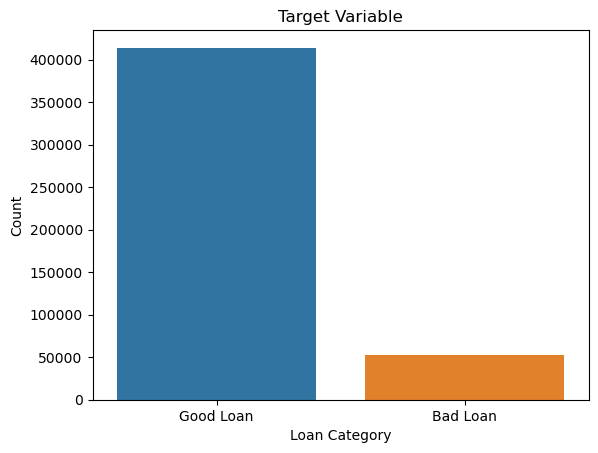

In [12]:
# check imbalance data
x_label = ['Good Loan', 'Bad Loan'] # 0 1
sns.barplot(x = x_label, y = data.good_bad_loan.value_counts(), palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Target Variable')
plt.show()

Berdasarkan plot tersebut kita dapat ketahui bahwa data tidak balance

In [13]:
# Columns that have > 70% missing values
missing_values = data.isnull().mean()
missing_50 = missing_values[missing_values > 0.7]
missing_50

desc                           0.729820
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [14]:
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code', 'pymnt_plan']
data = data.drop(columns=columns_to_drop, axis=1)
data = data.dropna()

In [15]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad_loan
42537,12000,12000,12000.0,36 months,6.62,368.45,A,10+ years,MORTGAGE,105000.0,...,Jan-16,368.45,Jan-16,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0
42538,12000,12000,12000.0,36 months,13.53,407.40,B,10+ years,RENT,40000.0,...,Sep-15,119.17,Jan-16,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,0
42539,15000,15000,15000.0,36 months,8.90,476.30,A,2 years,MORTGAGE,63000.0,...,Jan-16,476.30,Jan-16,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0
42541,14000,14000,14000.0,36 months,12.85,470.71,B,4 years,RENT,88000.0,...,Jan-16,470.71,Jan-16,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0
42543,10000,10000,10000.0,36 months,9.67,321.13,B,7 years,MORTGAGE,102000.0,...,Jan-16,321.13,Jan-16,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0


### Univariate

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


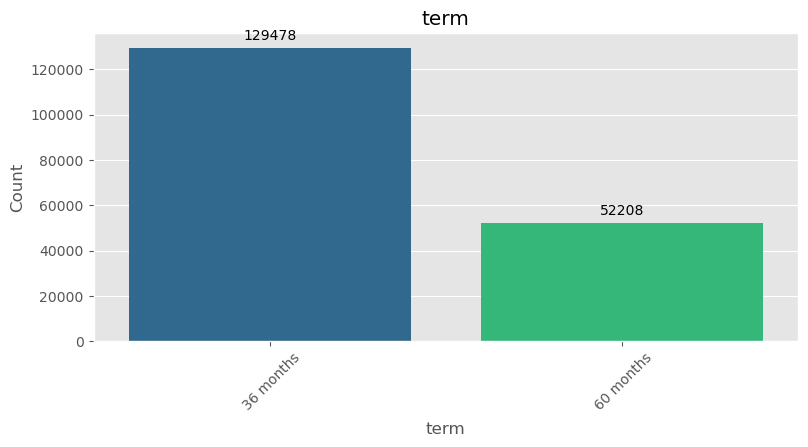

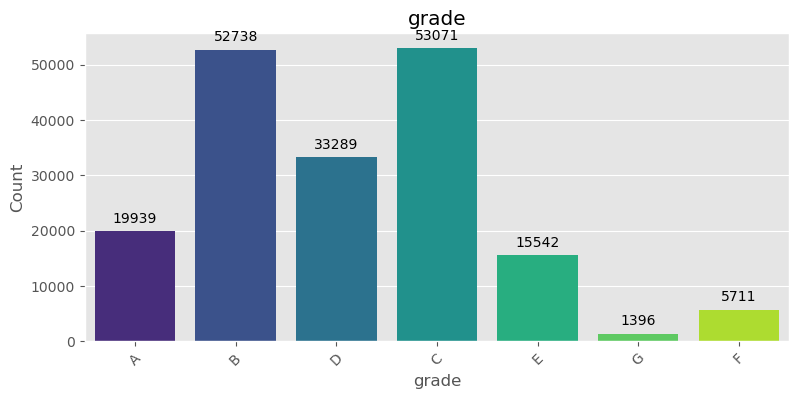

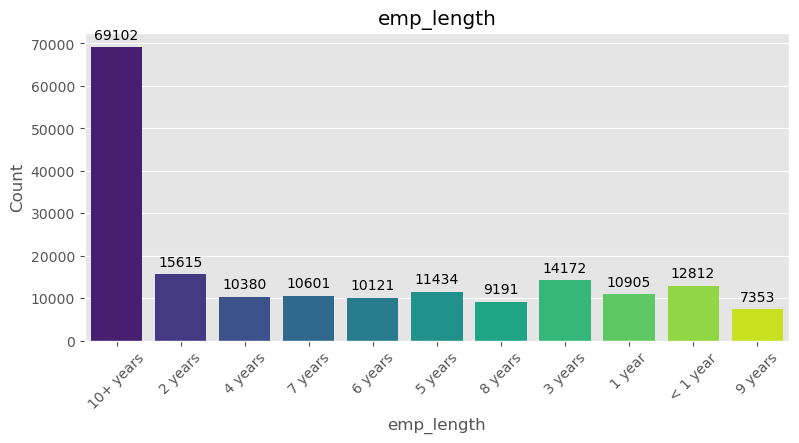

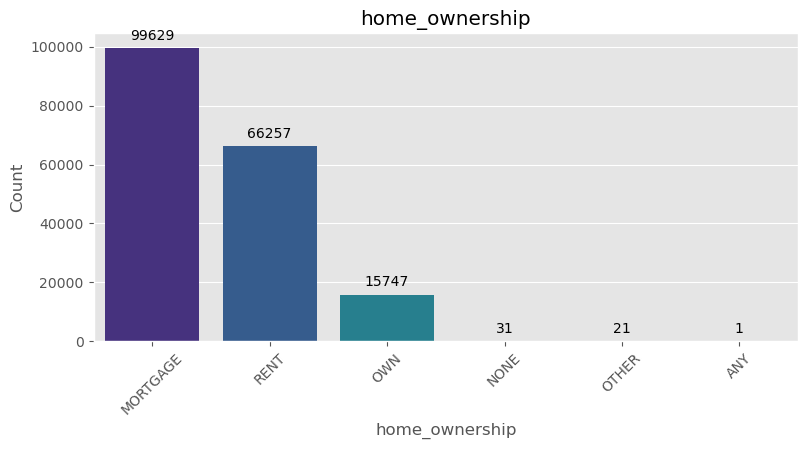

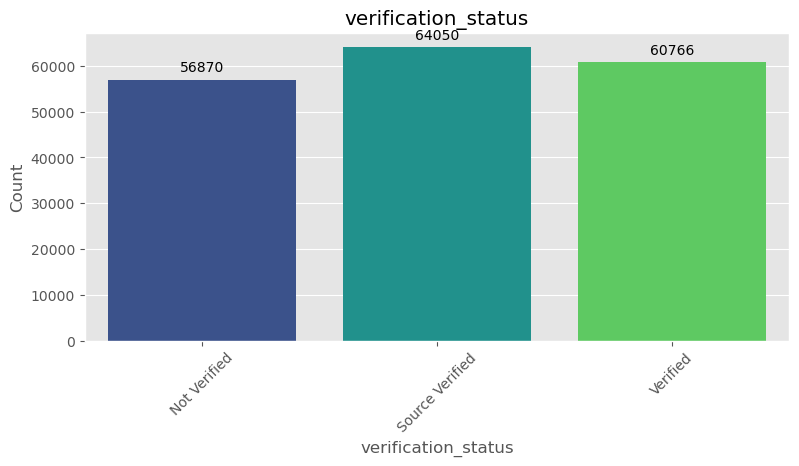

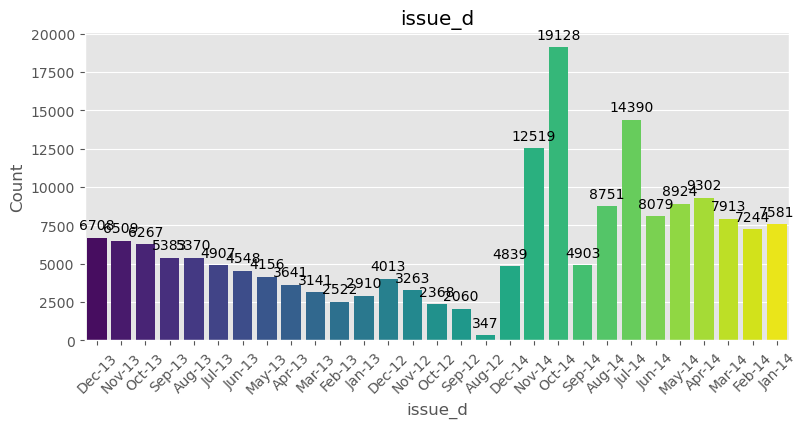

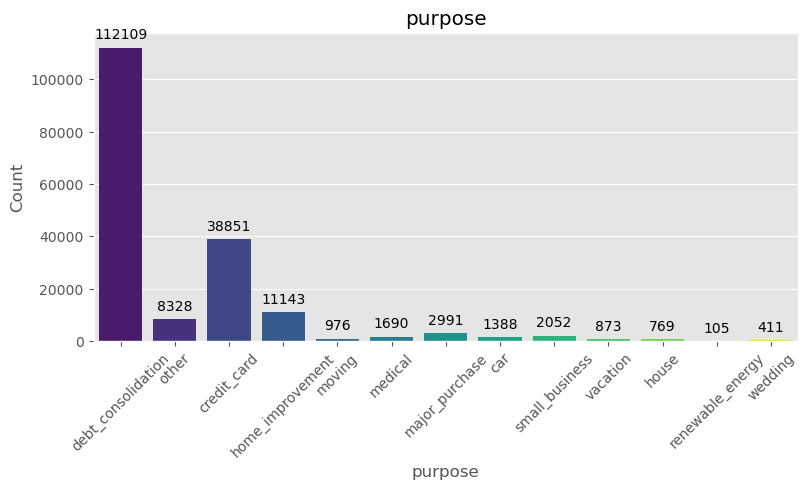

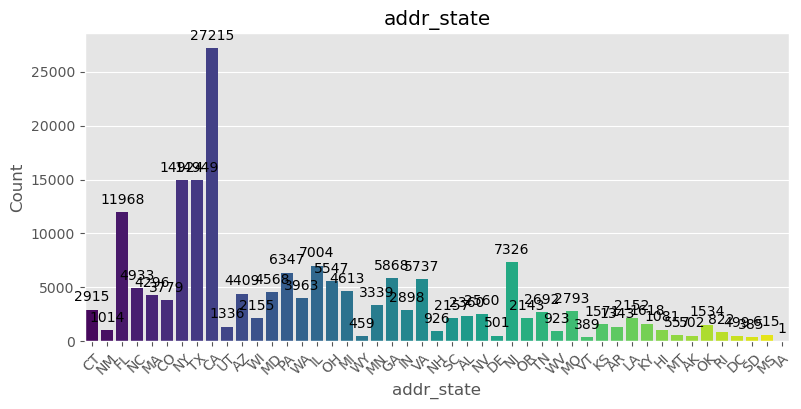

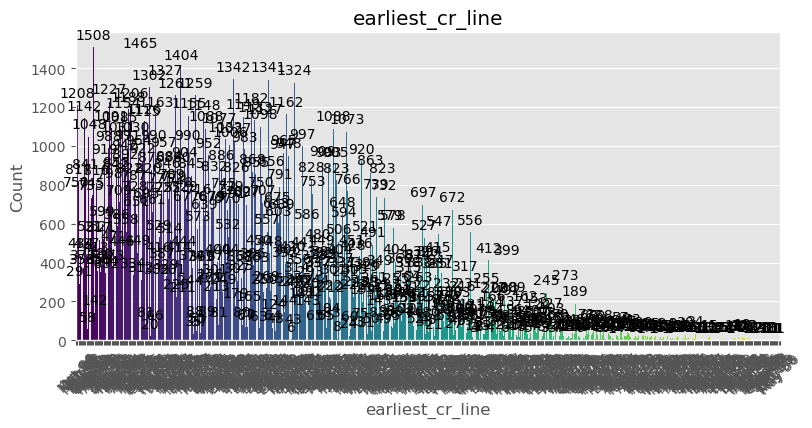

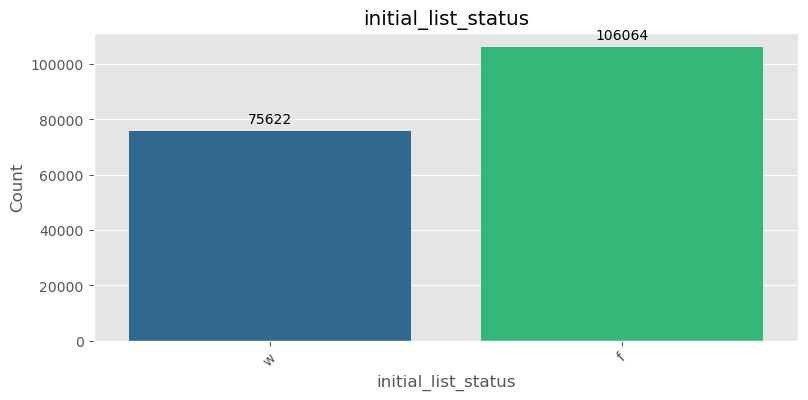

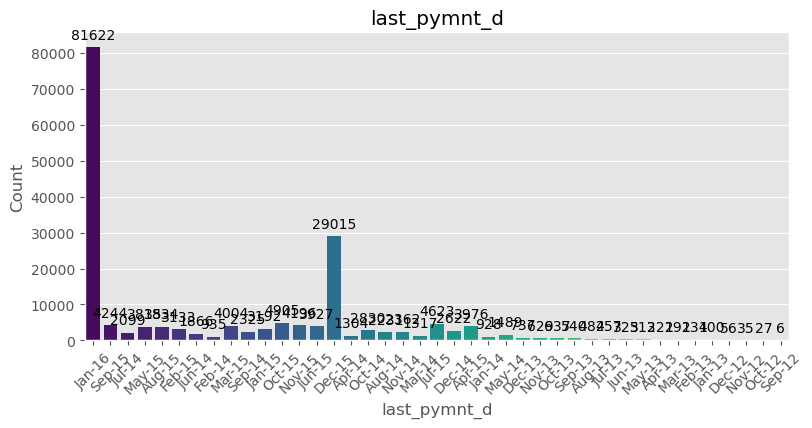

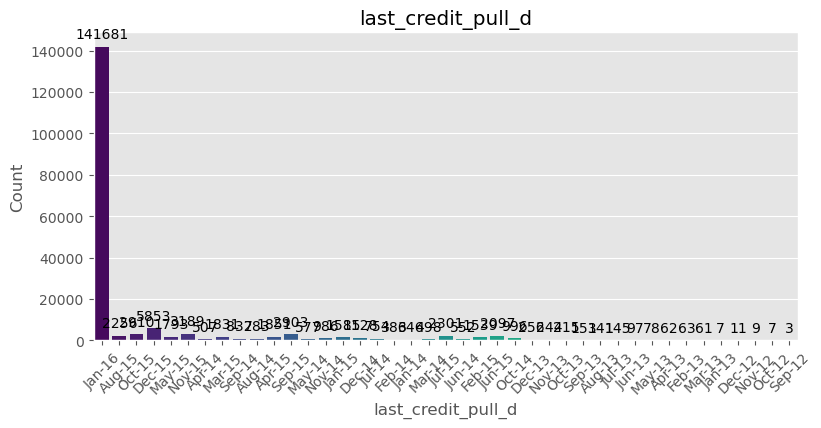

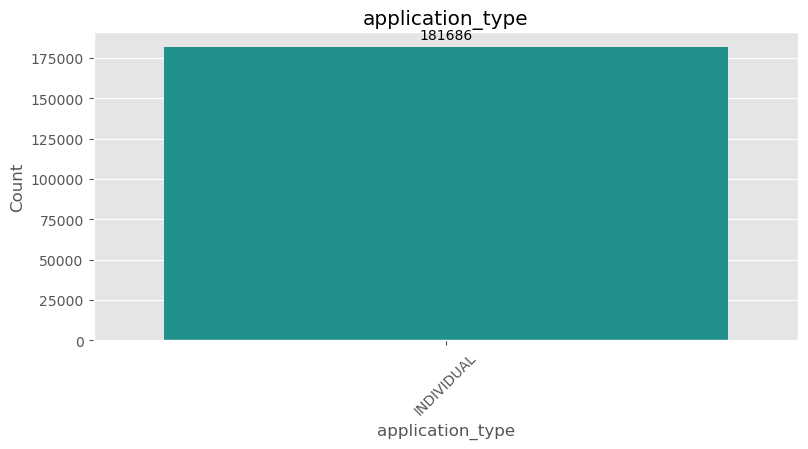

In [16]:
# indentifying the categorical variables
cat_var = data.select_dtypes(include=["object"]).columns
print(cat_var)

# Plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)

    ax = sns.countplot(x=column, data=data)

    # Menambahkan warna manual ke setiap bar
    for patch, color in zip(ax.patches, sns.color_palette("viridis", len(ax.patches))):
        patch.set_facecolor(color)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate the x labels for better readability
    plt.show()

In [17]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad_loan
42537,12000,12000,12000.0,6.62,368.45,105000.0,14.05,0.0,1.0,43.0,...,8842.80,8842.80,1109.42,368.45,0.0,0.0,0.0,267646.0,61100.0,0
42538,12000,12000,12000.0,13.53,407.40,40000.0,16.94,0.0,0.0,53.0,...,13359.77,13359.77,1359.78,119.17,0.0,0.0,15386.0,13605.0,8100.0,0
42539,15000,15000,15000.0,8.90,476.30,63000.0,16.51,0.0,0.0,34.0,...,11431.20,11431.20,1880.47,476.30,0.0,0.0,1514.0,272492.0,15400.0,0
42541,14000,14000,14000.0,12.85,470.71,88000.0,10.02,1.0,0.0,16.0,...,11296.94,11296.94,2571.04,470.71,0.0,0.0,0.0,17672.0,4500.0,0
42543,10000,10000,10000.0,9.67,321.13,102000.0,15.55,2.0,0.0,11.0,...,7706.81,7706.81,1365.93,321.13,0.0,0.0,0.0,39143.0,22300.0,0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of loan_amnt
Average :  14691.82
Standard deviation :  8251.24
Median :  13000.00
Mode :  10000


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of funded_amnt
Average :  14691.76
Standard deviation :  8251.15
Median :  13000.00
Mode :  10000


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of funded_amnt_inv
Average :  14685.48
Standard deviation :  8248.02
Median :  12975.00
Mode :  10000


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of int_rate
Average :  14.45
Standard deviation :  4.25
Median :  14.16
Mode :  12


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of installment
Average :  446.73
Standard deviation :  244.81
Median :  392.81
Mode :  327


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of annual_inc
Average :  78866.98
Standard deviation :  60785.31
Median :  68000.00
Mode :  60000


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of dti
Average :  17.39
Standard deviation :  7.79
Median :  16.91
Mode :  14


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of delinq_2yrs
Average :  0.64
Standard deviation :  1.10
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of inq_last_6mths
Average :  0.82
Standard deviation :  1.06
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of mths_since_last_delinq
Average :  33.72
Standard deviation :  21.72
Median :  30.00
Mode :  9


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of open_acc
Average :  11.76
Standard deviation :  5.00
Median :  11.00
Mode :  9


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of pub_rec
Average :  0.19
Standard deviation :  0.56
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of revol_bal
Average :  14984.60
Standard deviation :  20064.51
Median :  10850.50
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of revol_util
Average :  56.55
Standard deviation :  22.58
Median :  57.40
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of total_acc
Average :  27.81
Standard deviation :  11.31
Median :  26.00
Mode :  24


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of out_prncp
Average :  5291.50
Standard deviation :  6660.86
Median :  2637.22
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of out_prncp_inv
Average :  5289.69
Standard deviation :  6658.88
Median :  2635.37
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of total_pymnt
Average :  11215.61
Standard deviation :  7986.95
Median :  9127.11
Mode :  6743


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of total_pymnt_inv
Average :  11210.35
Standard deviation :  7982.97
Median :  9122.44
Mode :  6743


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of total_rec_int
Average :  2679.86
Standard deviation :  2470.23
Median :  1925.52
Mode :  2148


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updatin

Statistic summary of last_pymnt_amnt
Average :  3146.52
Standard deviation :  5633.25
Median :  539.81
Mode :  327


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of collections_12_mths_ex_med
Average :  0.02
Standard deviation :  0.15
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of acc_now_delinq
Average :  0.01
Standard deviation :  0.11
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of tot_coll_amt
Average :  326.38
Standard deviation :  21577.45
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of tot_cur_bal
Average :  150564.44
Standard deviation :  159561.65
Median :  98471.50
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of total_rev_hi_lim
Average :  27351.55
Standard deviation :  42436.96
Median :  20600.00
Mode :  15000


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))
C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Statistic summary of good_bad_loan
Average :  0.10
Standard deviation :  0.30
Median :  0.00
Mode :  0


C:\Users\Alisha Zahra\AppData\Local\Temp\ipykernel_9912\3797646368.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Mode : ', int(mode))


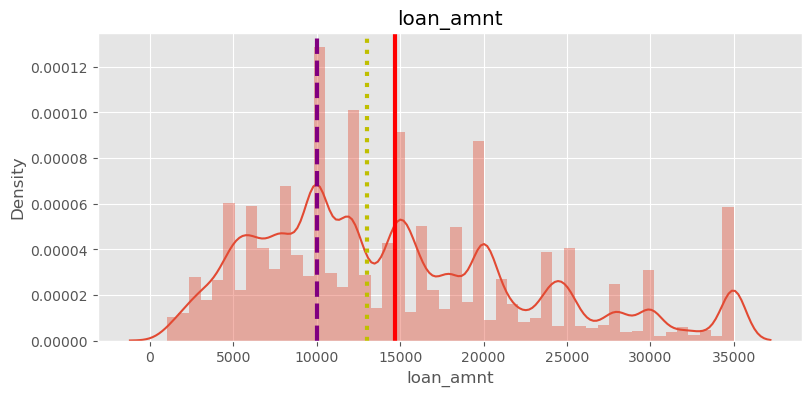

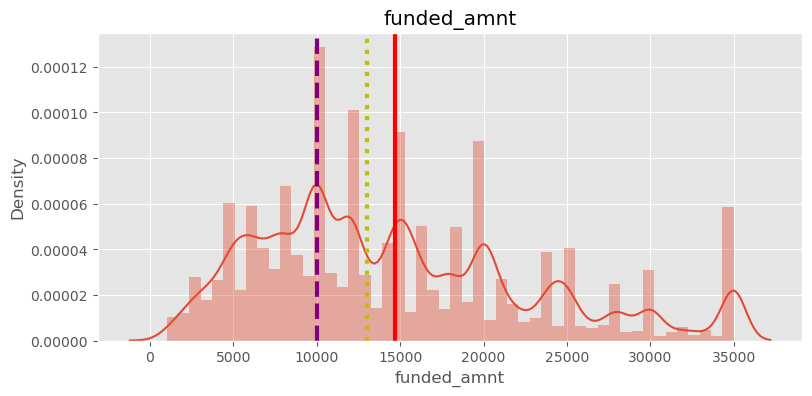

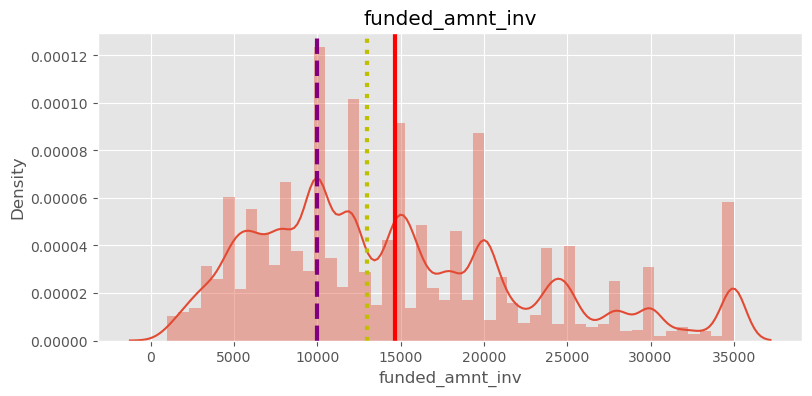

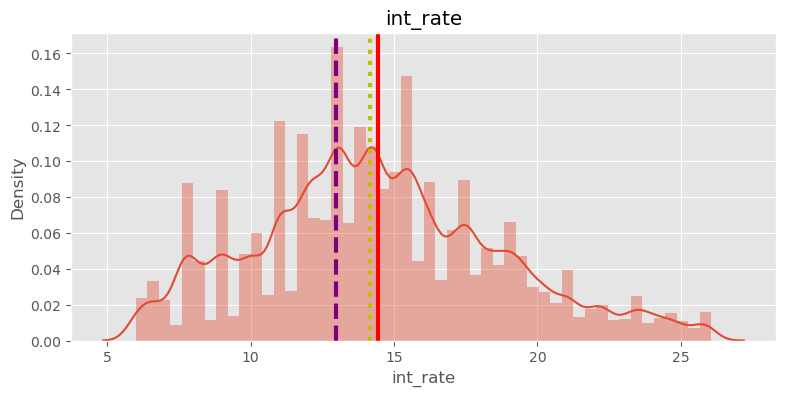

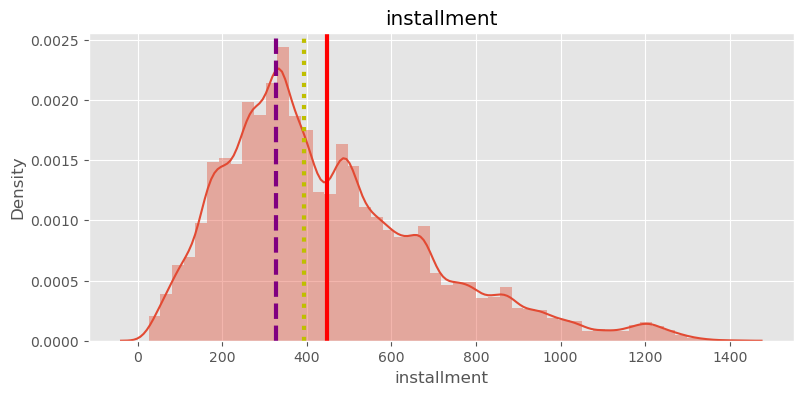

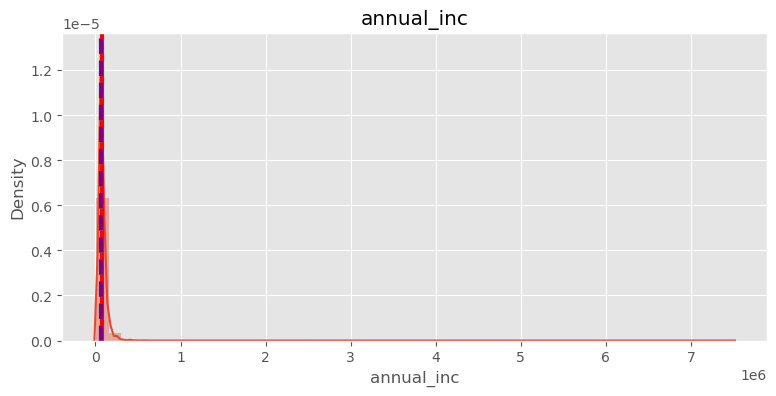

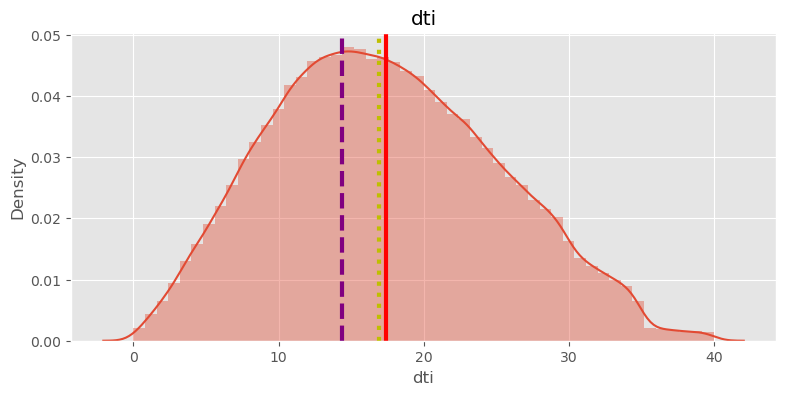

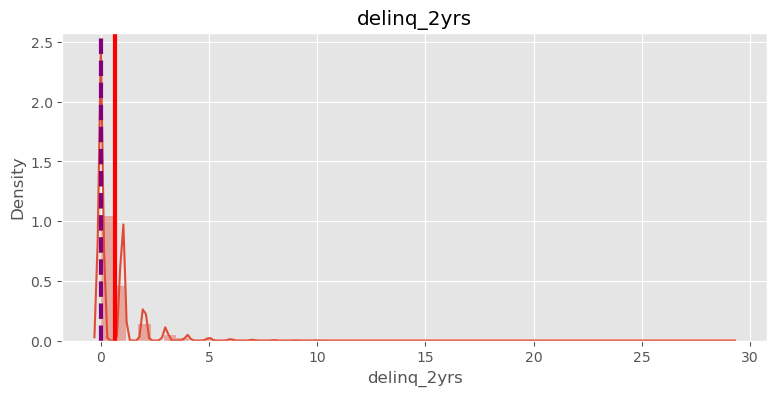

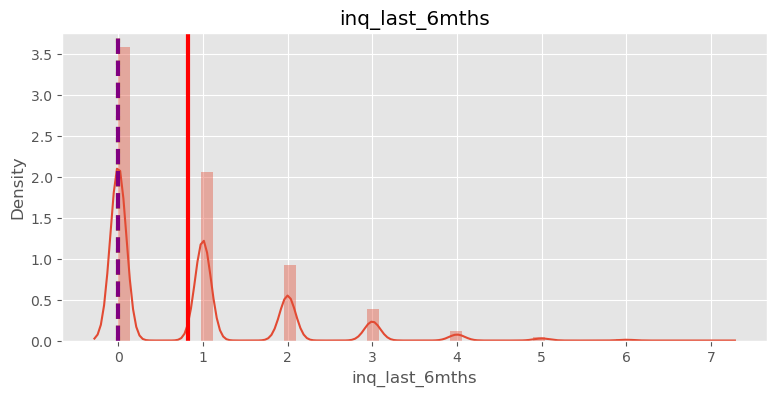

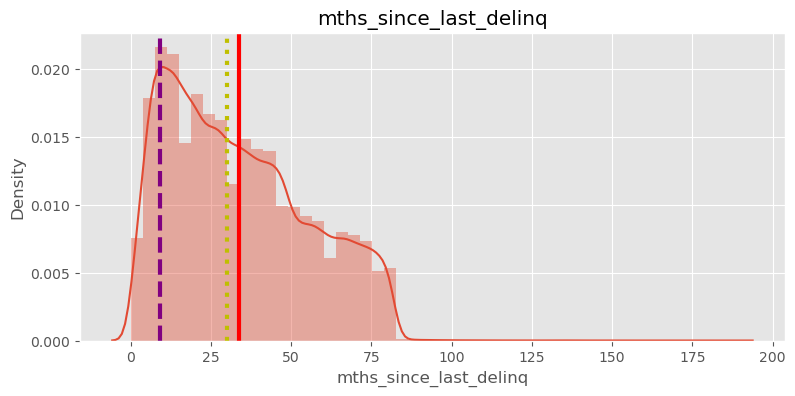

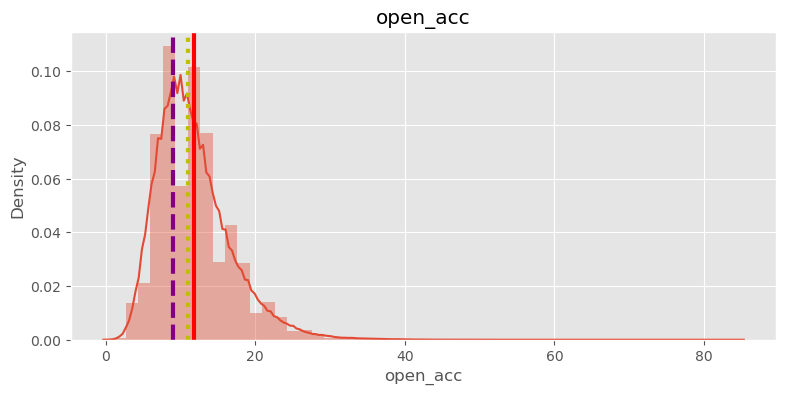

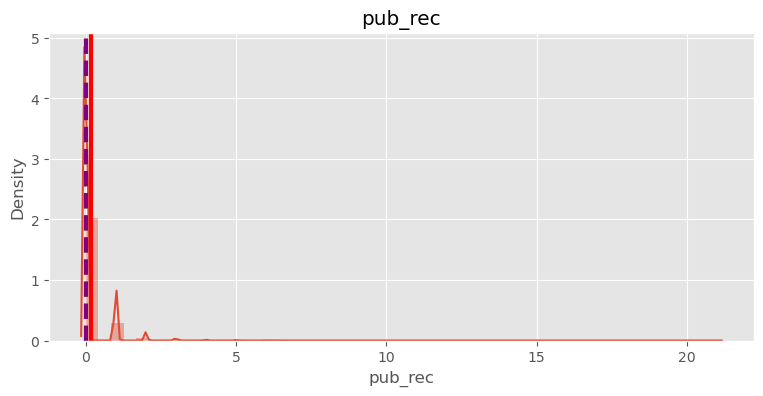

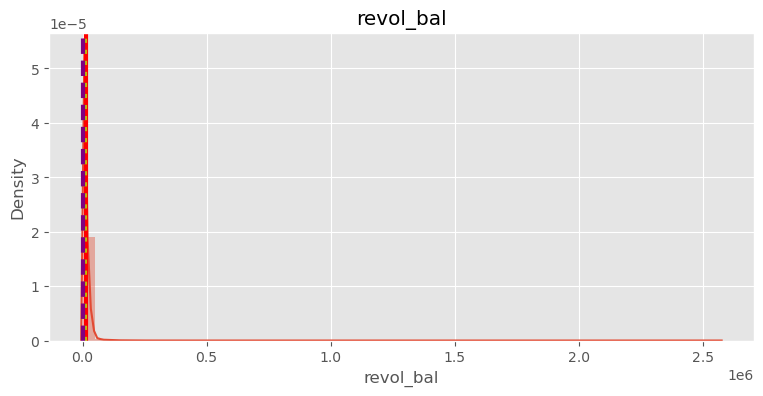

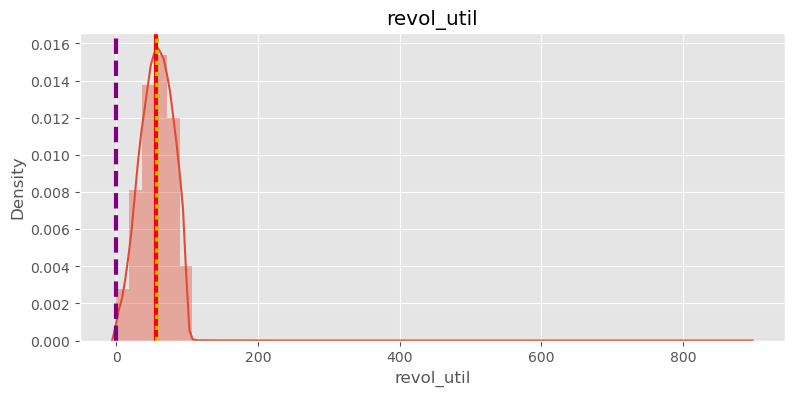

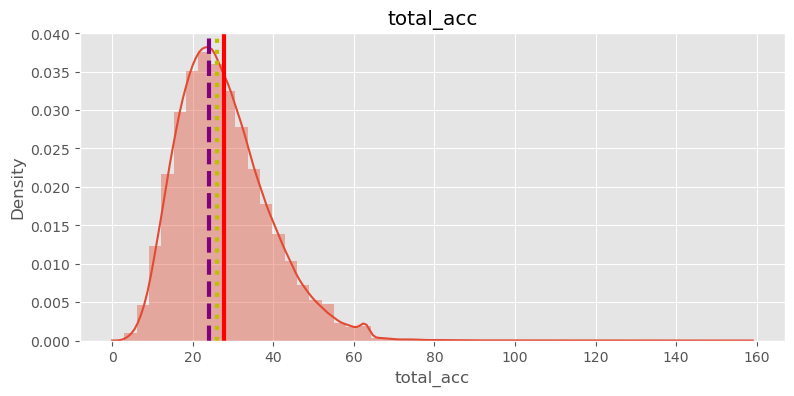

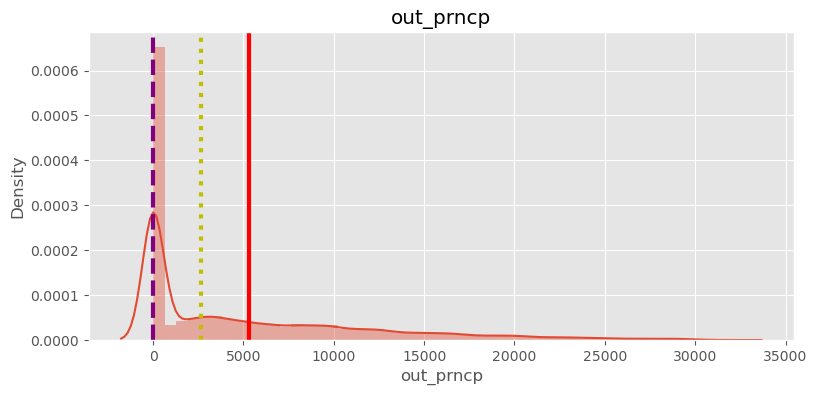

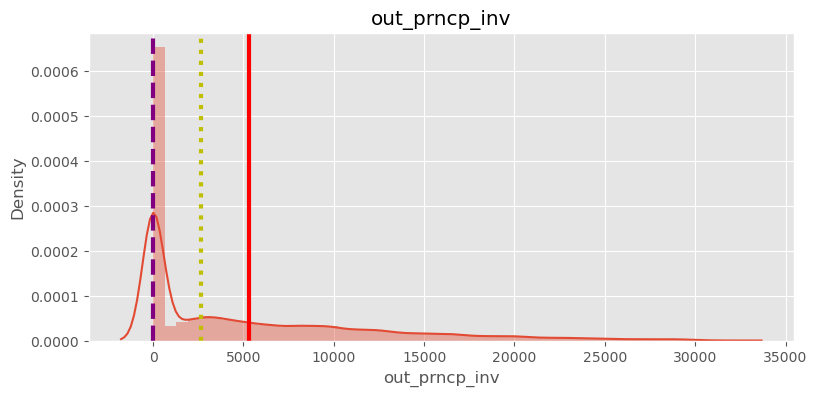

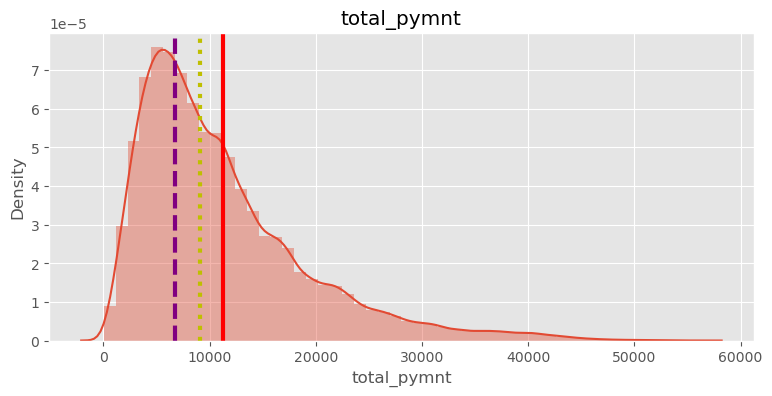

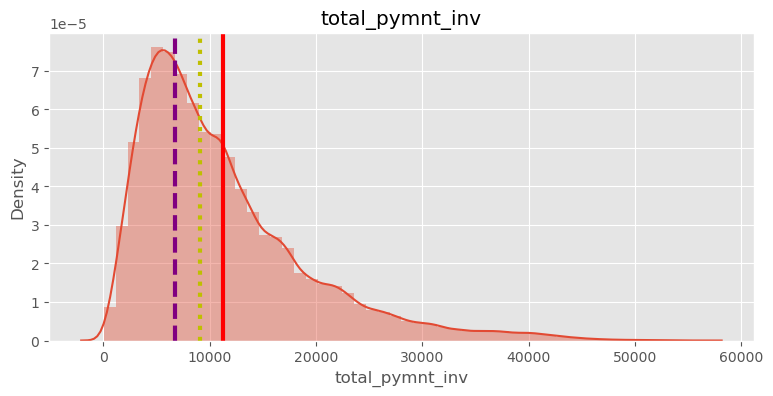

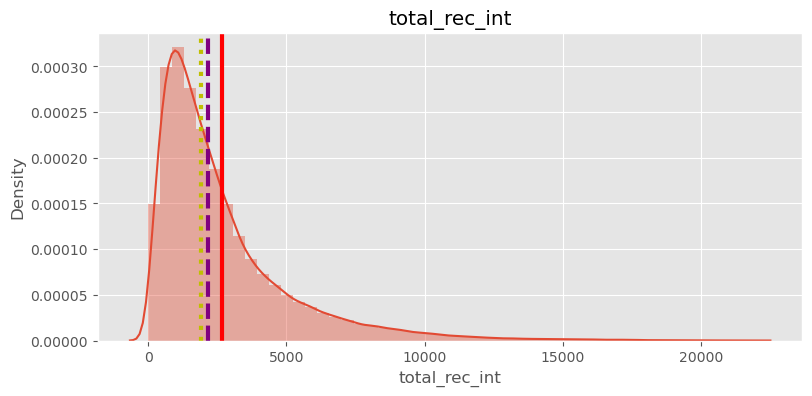

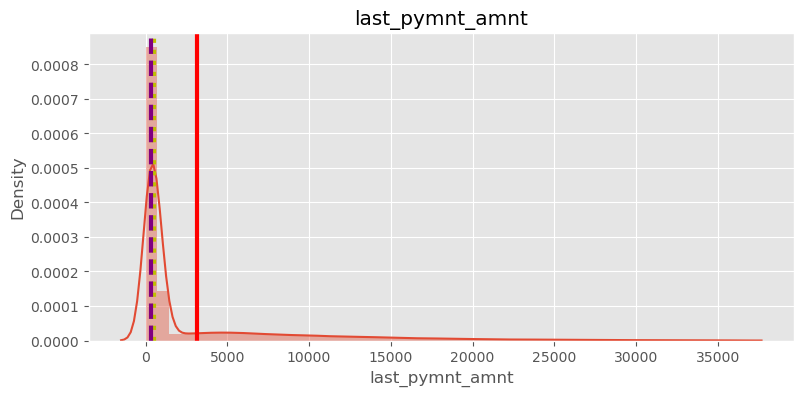

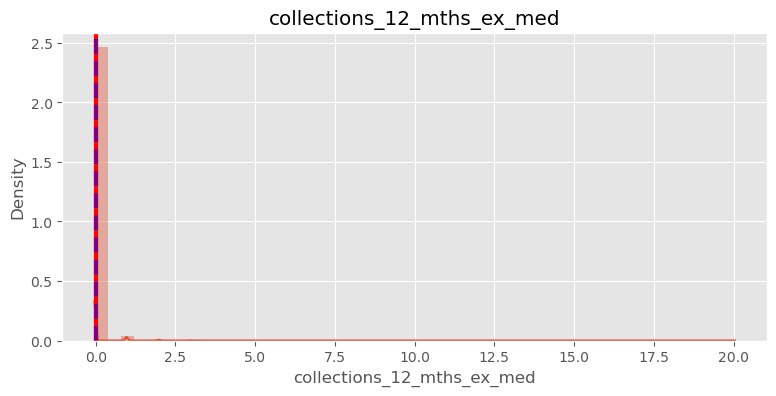

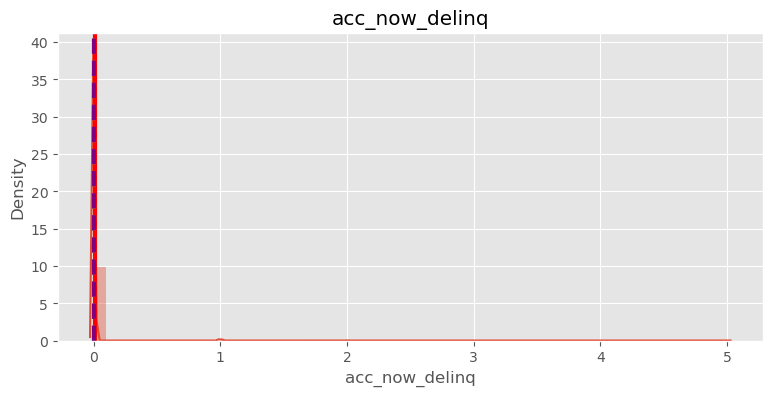

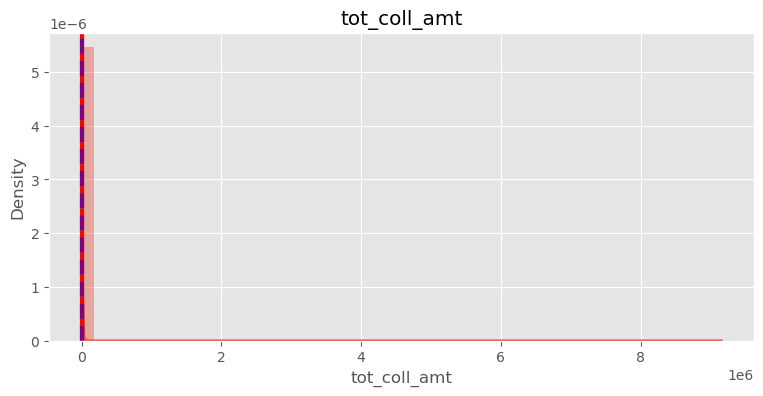

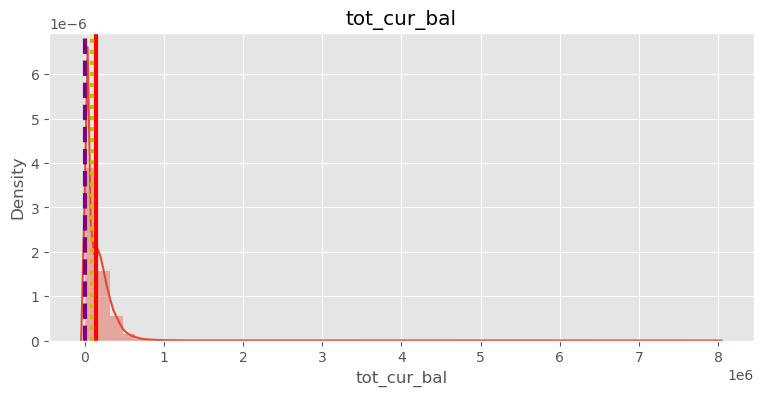

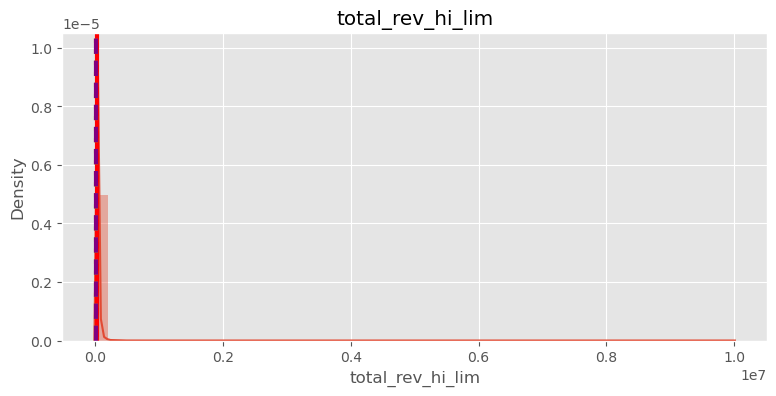

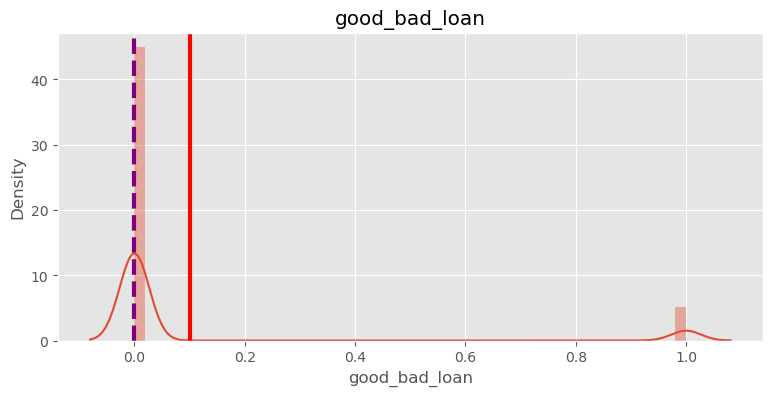

In [18]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in num_var:
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()
    std = data[column].std()

    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
    plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')
    plt.title(column)

    print('Statistic summary of {columns}'.format(columns=column))
    print('Average : ', "%.2f" %average)
    print('Standard deviation : ', "%.2f" %std)
    print('Median : ', "%.2f" %median)
    print('Mode : ', int(mode))

### Bivariate

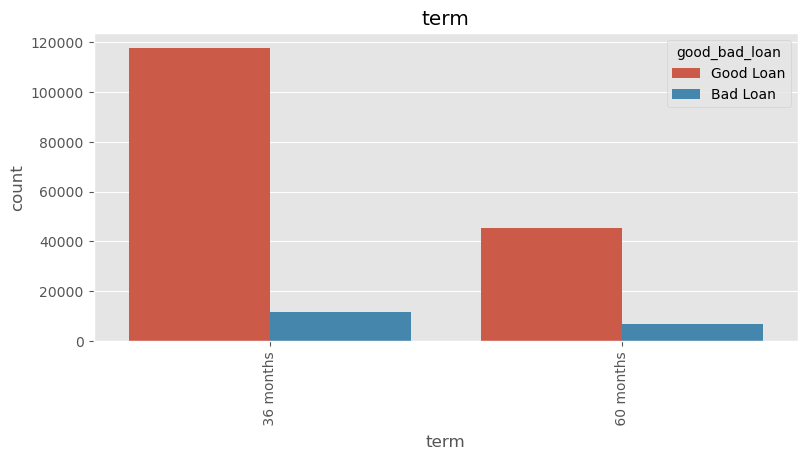

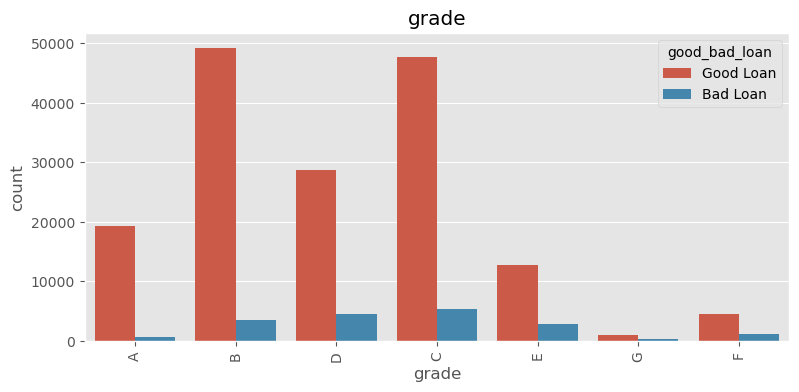

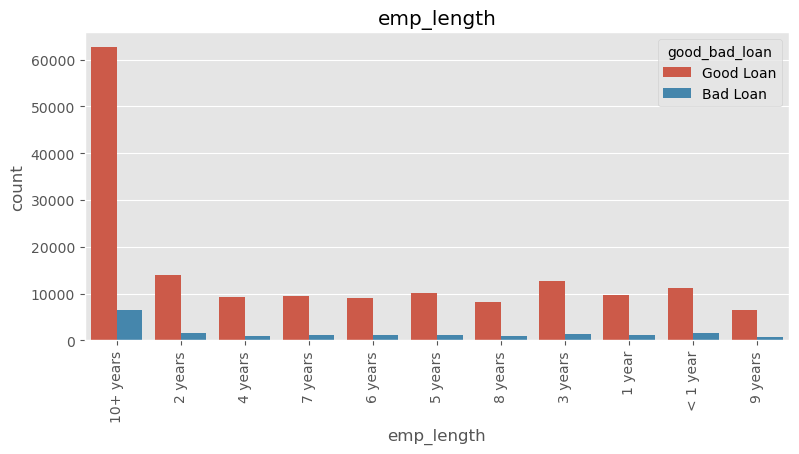

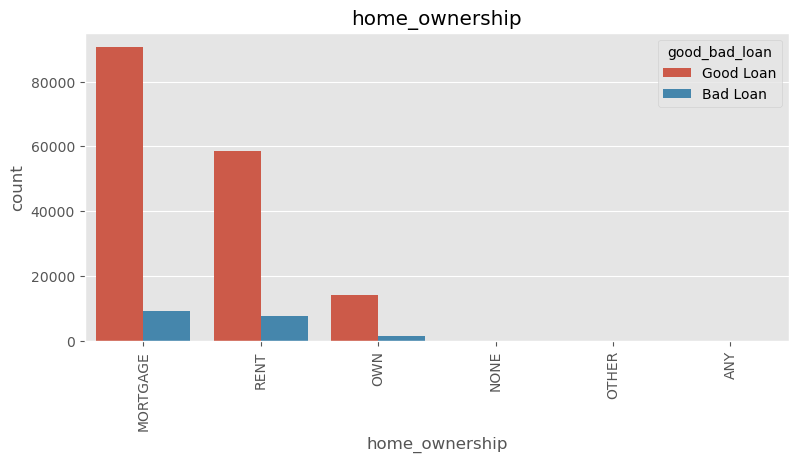

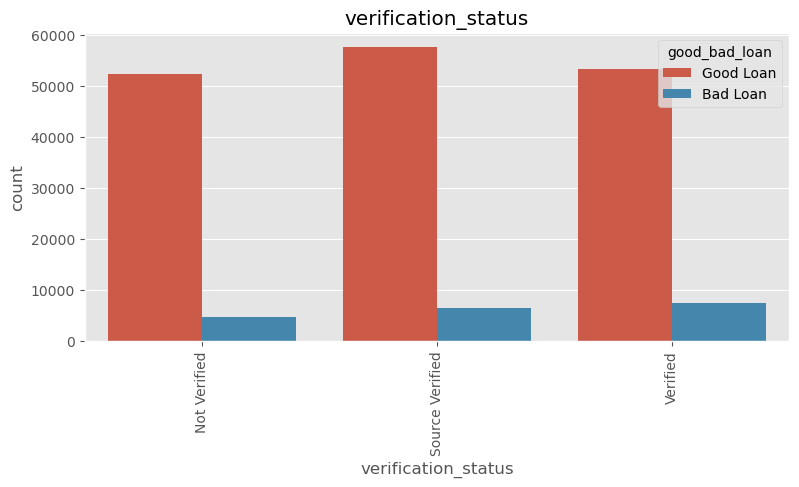

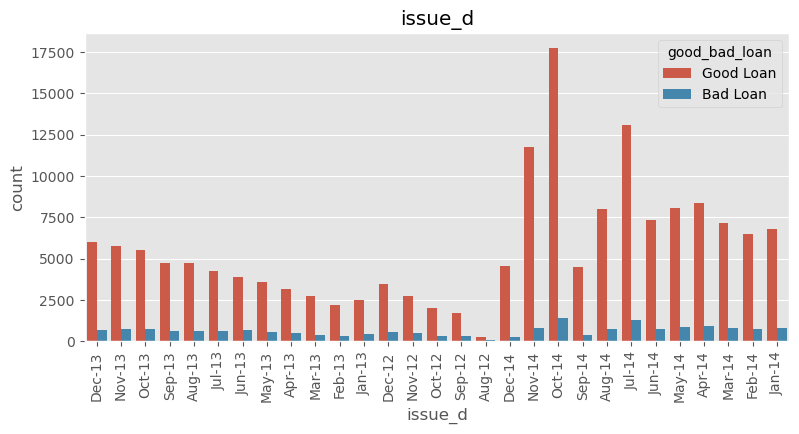

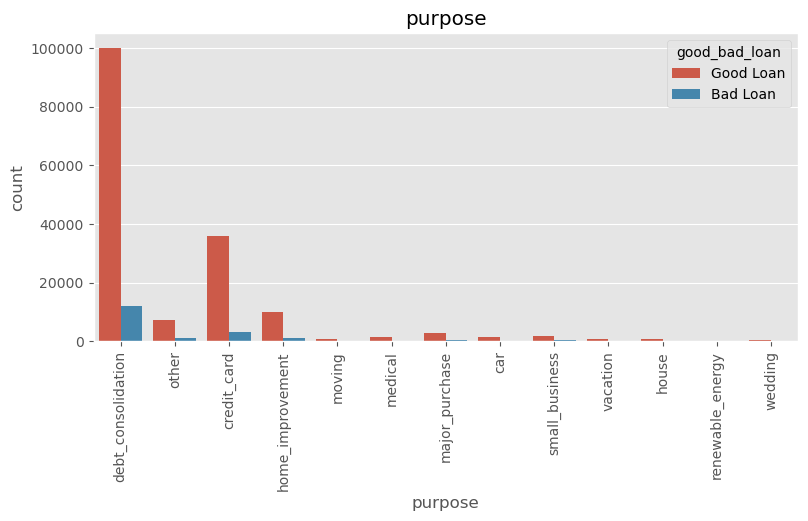

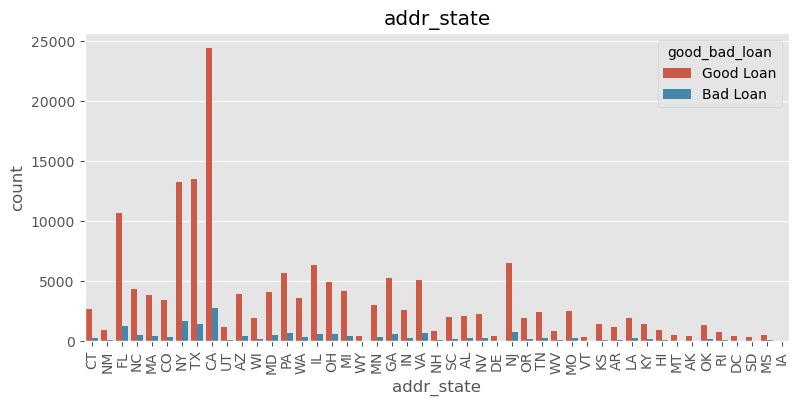

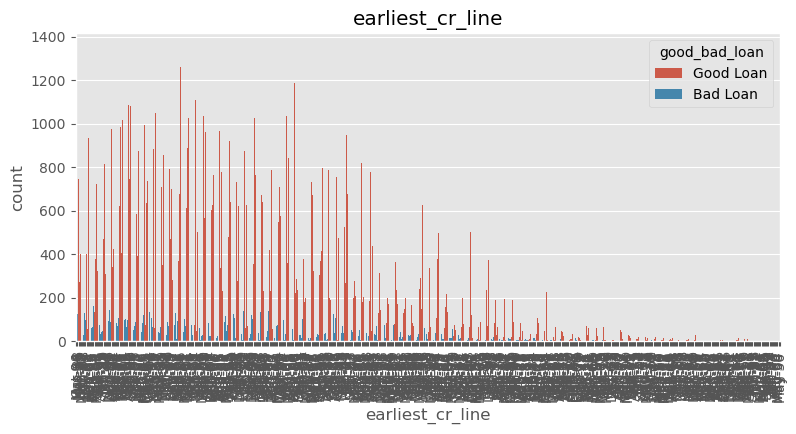

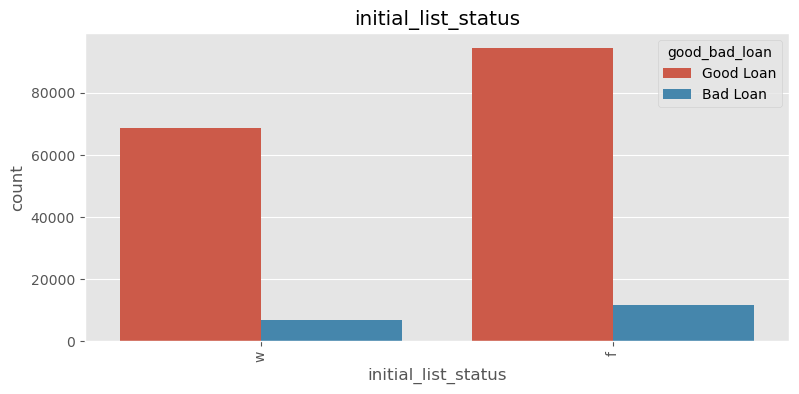

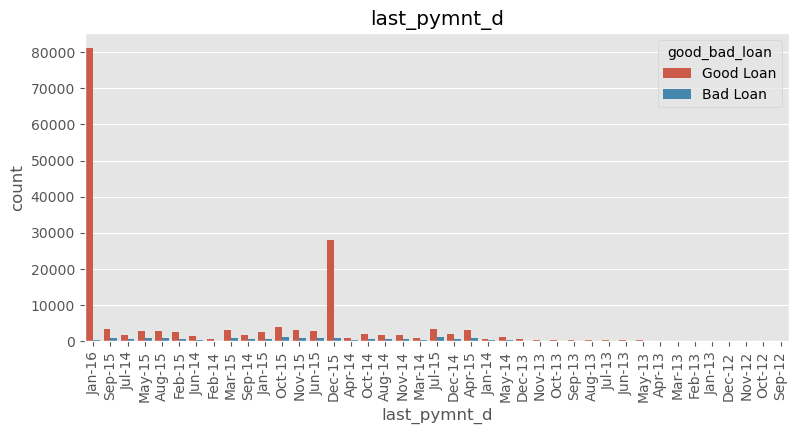

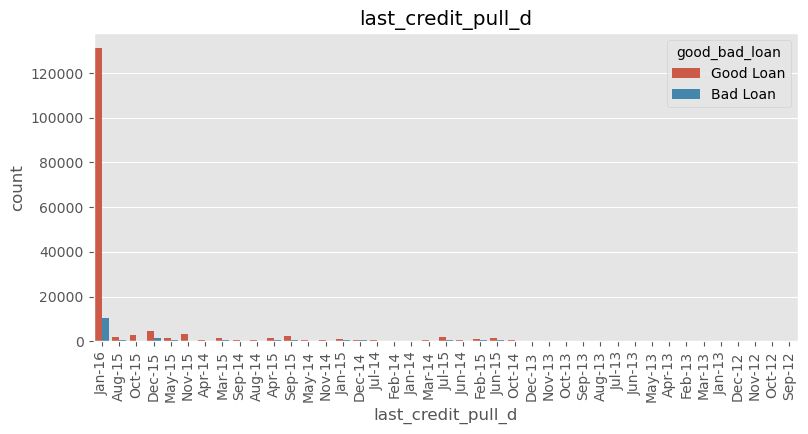

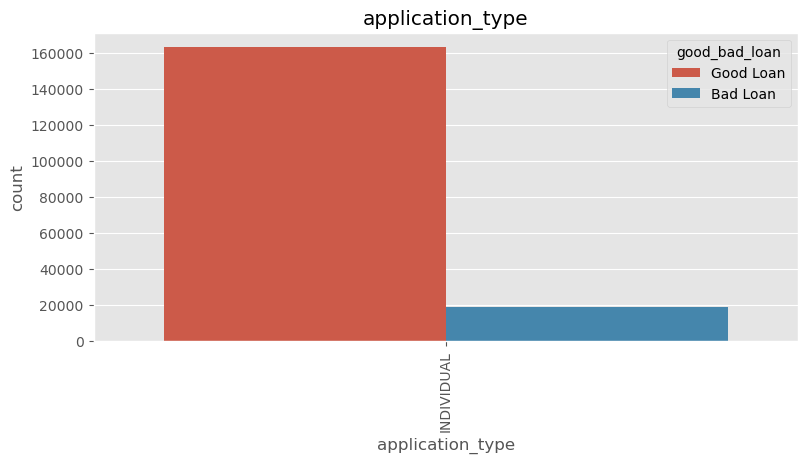

In [19]:
plt.style.use("ggplot")
data['good_bad_loan'] = data['good_bad_loan'].map({0: 'Good Loan', 1: 'Bad Loan'})
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=data[column], hue=data["good_bad_loan"])
    plt.title(column)
    plt.xticks(rotation=90)

### Correlation

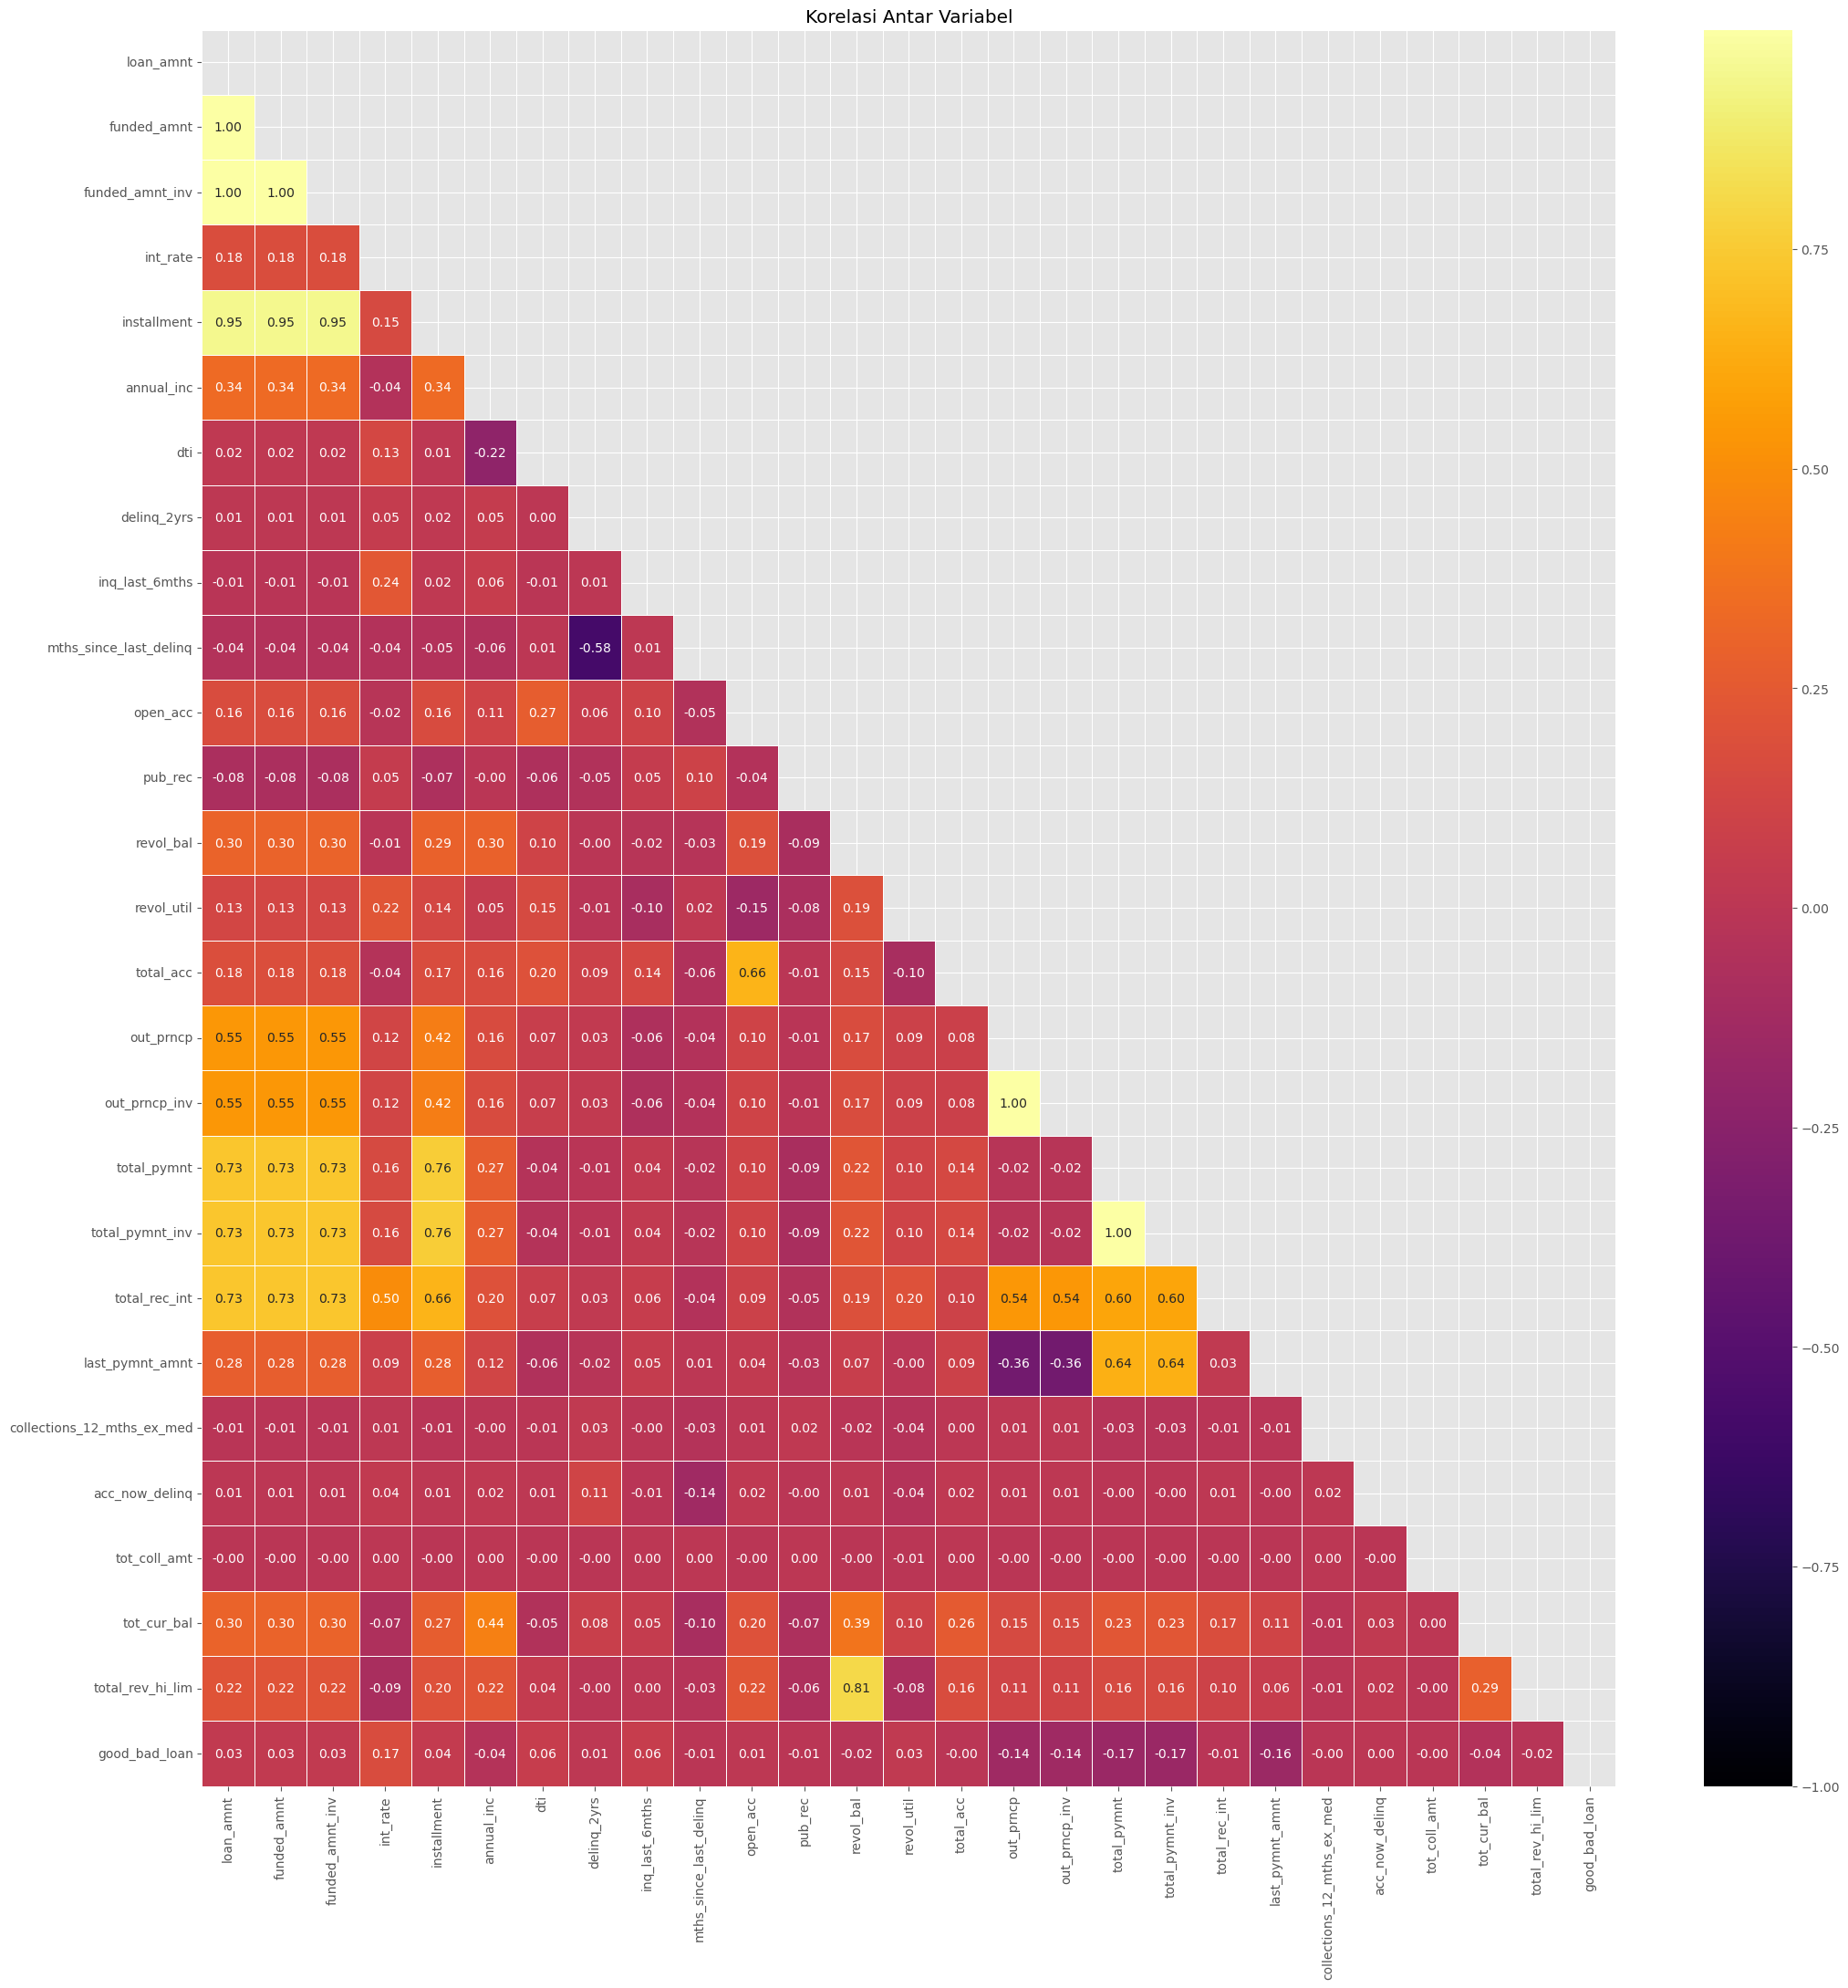

In [20]:
mask = np.zeros_like(num_var.corr().fillna(0), dtype=np.number)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap untuk korelasi antar variabel
plt.figure(figsize=(25, 25))
sns.heatmap(num_var.corr(), mask=mask, annot=True, cmap="inferno", vmin=-1, fmt='.2f',
            linewidths=0.5, linecolor='white', cbar=True)
plt.title('Korelasi Antar Variabel')
plt.show()

In [21]:
df = num_var.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], axis = 1)

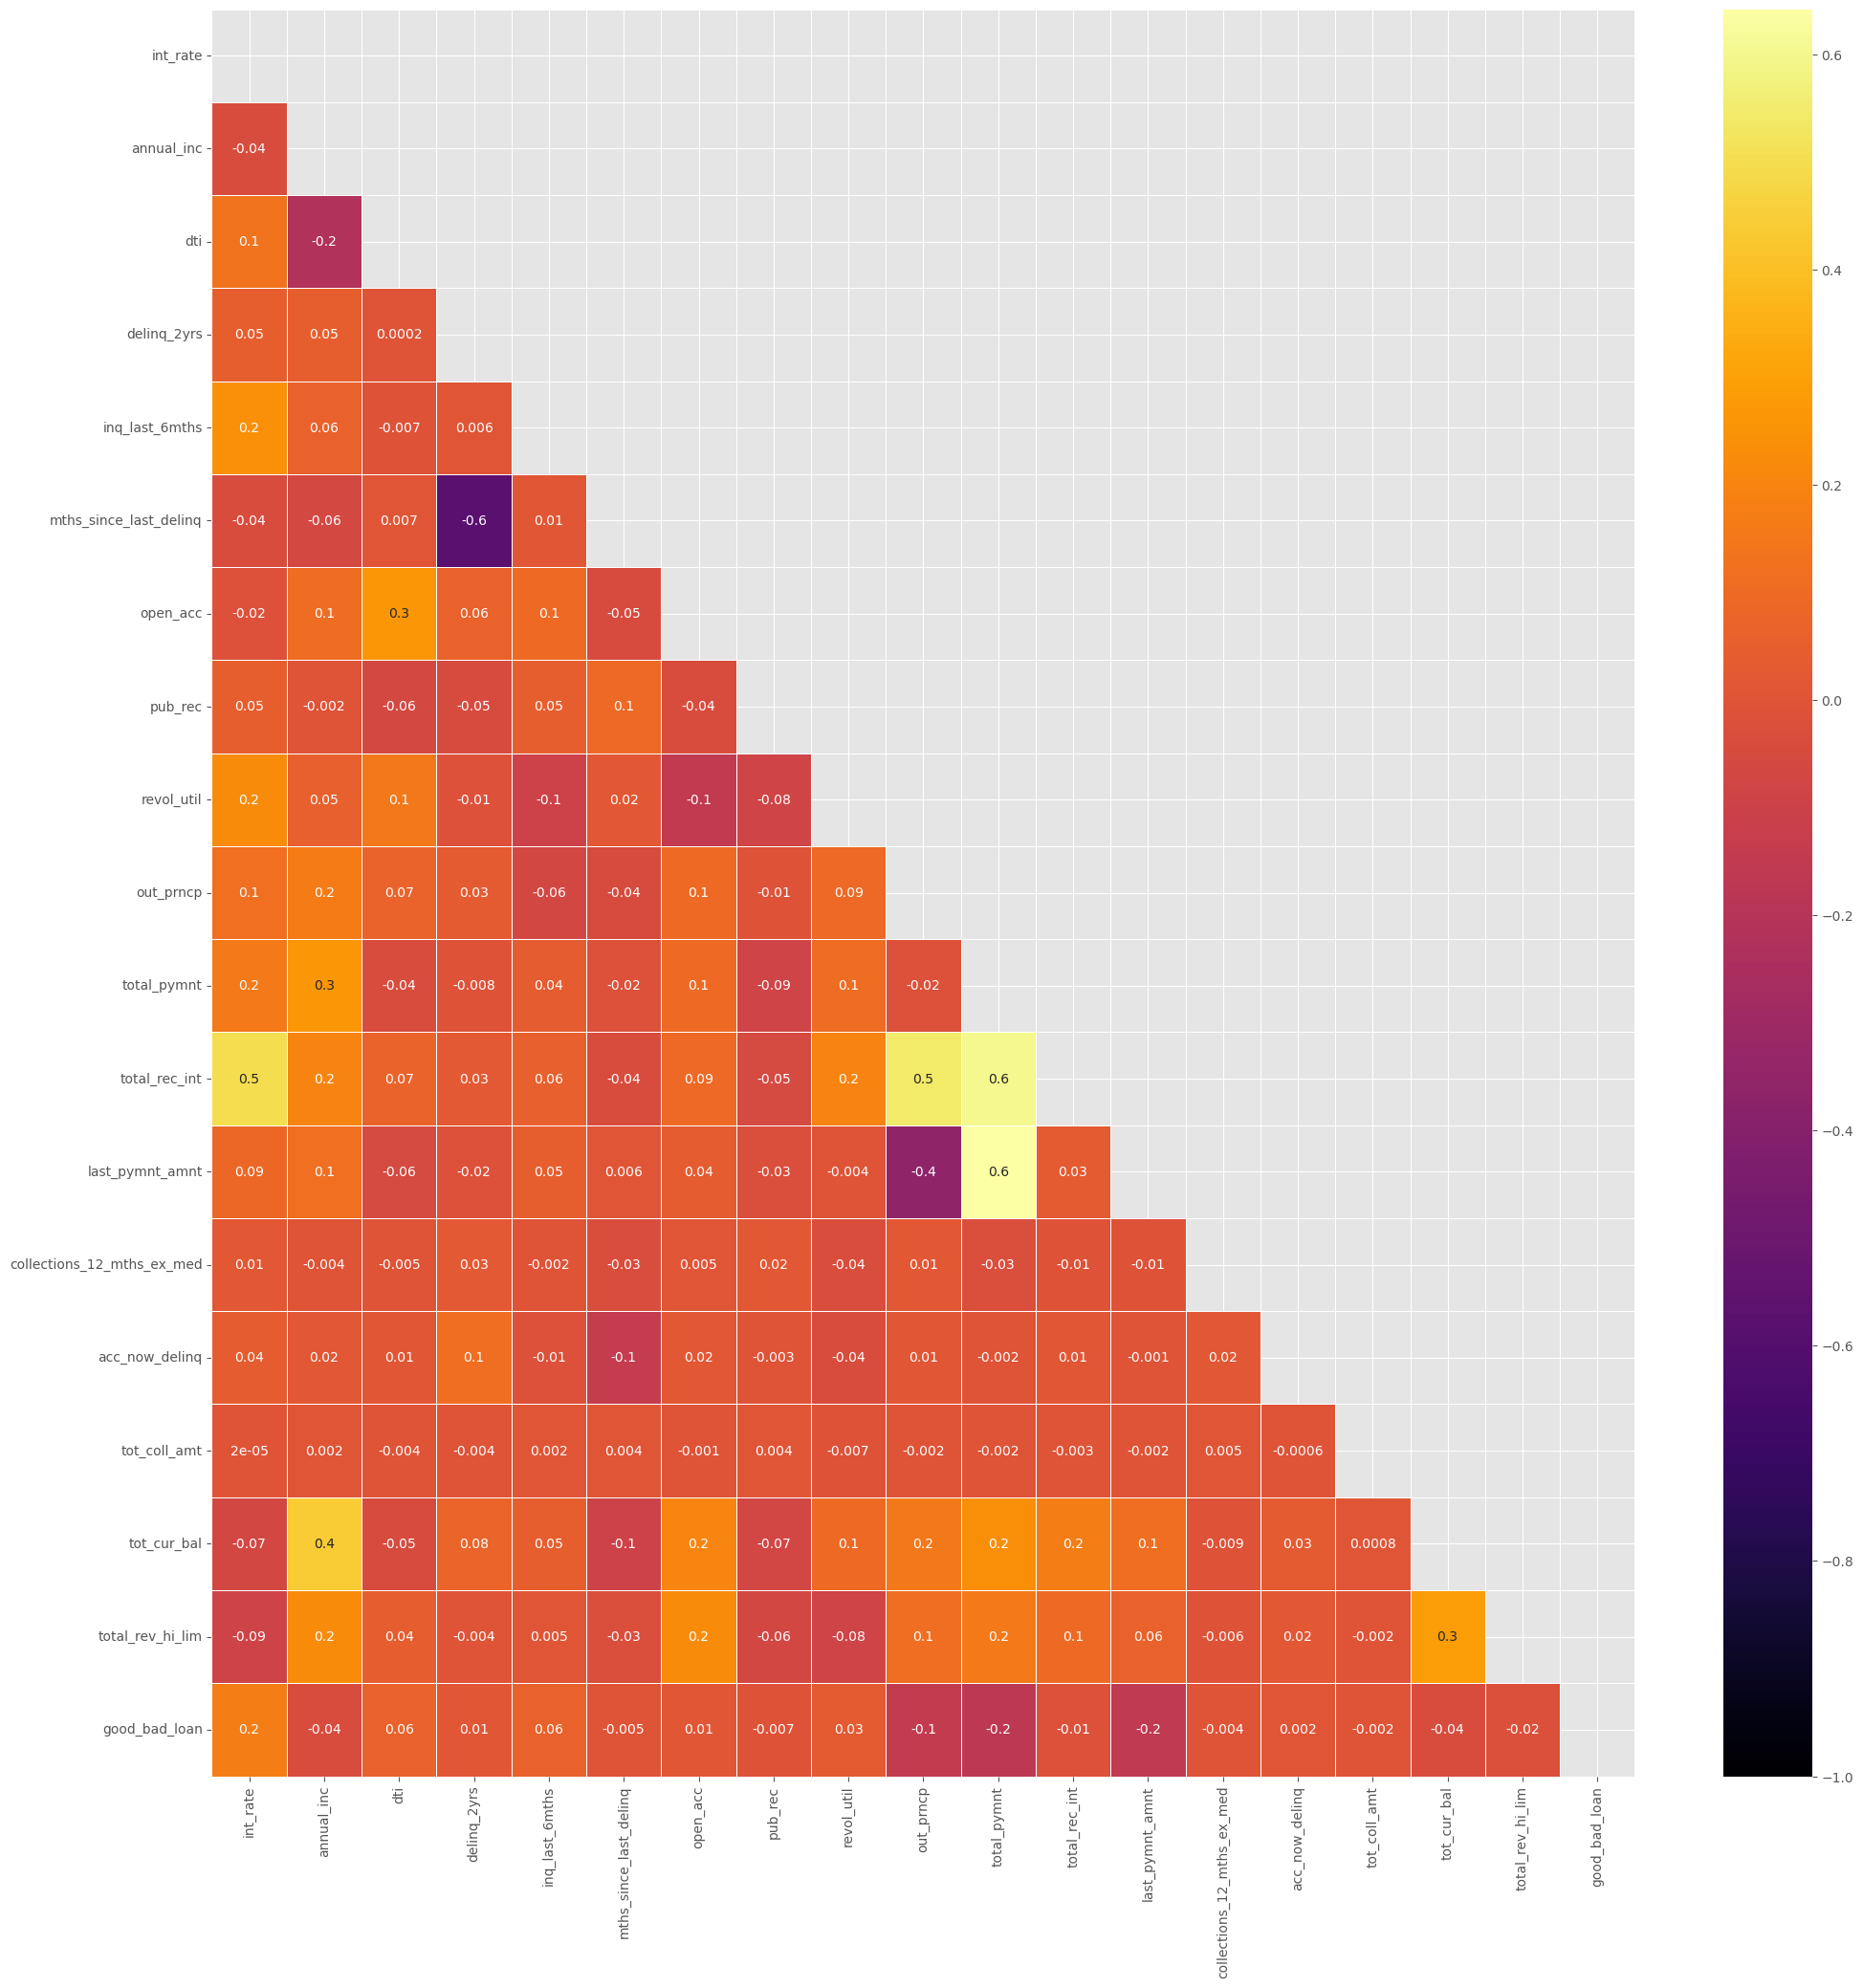

In [22]:
mask = np.zeros_like(df.corr().fillna(0), dtype=np.number)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)
plt.show()

# Data Preparation

In [23]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad_loan
count,181686.000000,1.816860e+05,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,1.816860e+05,1.816860e+05,1.816860e+05,181686.000000
mean,14.449868,7.886698e+04,17.389873,0.638040,0.822942,33.724167,11.756382,0.189244,56.548318,5291.496180,11215.608032,2679.857733,3146.519033,0.016418,0.009808,3.263843e+02,1.505644e+05,2.735155e+04,0.101604
std,4.252272,6.078531e+04,7.787230,1.104461,1.059299,21.716923,4.997763,0.557625,22.583195,6660.857513,7986.951463,2470.226061,5633.250884,0.149082,0.107319,2.157745e+04,1.595617e+05,4.243696e+04,0.302127
min,6.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,11.670000,5.000000e+04,11.530000,0.000000,0.000000,15.000000,8.000000,0.000000,40.300000,0.000000,5485.875000,1037.310000,321.130000,0.000000,0.000000,0.000000e+00,3.245125e+04,1.230000e+04,0.000000
50%,14.160000,6.800000e+04,16.910000,0.000000,0.000000,30.000000,11.000000,0.000000,57.400000,2637.215000,9127.115000,1925.520000,539.810000,0.000000,0.000000,0.000000e+00,9.847150e+04,2.060000e+04,0.000000
75%,17.140000,9.402825e+04,22.900000,1.000000,1.000000,49.000000,14.000000,0.000000,73.900000,8883.127500,14685.300000,3432.090000,3048.777500,0.000000,0.000000,0.000000e+00,2.255148e+05,3.400000e+04,0.000000
max,26.060000,7.500000e+06,39.990000,29.000000,7.000000,188.000000,84.000000,21.000000,892.300000,31898.770000,56087.909920,21840.000000,36170.140000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [24]:
# converting emp_length to numeric and assign NaN to zero

data['emp_length'] = data['emp_length'].str.replace('10+ years', '10')
data['emp_length'] = data['emp_length'].str.replace('< 1 year', str(0))
data['emp_length'] = data['emp_length'].str.replace(' years', '')
data['emp_length'] = data['emp_length'].str.replace(' year', '')
data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')  # Menggunakan 'errors' untuk menangani nilai yang tidak dapat diubah menjadi numerik
data['emp_length'].fillna(value=0, inplace=True)

data['emp_length'].unique()


array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9], dtype=int64)

In [25]:
# converting term to numeric
data['term'] = data['term'].str.replace(' months', '').astype(float)

In [26]:
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], errors='coerce', format='%b-%y')
    
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    
    # handle negative values appropriately
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: x if x >= 0 else 0)
    
    # drop the original date column
    df.drop(columns=[column], inplace=True)

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad_loan,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
42537,12000,12000,12000.0,36.0,6.62,368.45,A,10,MORTGAGE,105000.0,...,INDIVIDUAL,0.0,0.0,267646.0,61100.0,Good Loan,79.0,54.0,54.0,311.0
42538,12000,12000,12000.0,36.0,13.53,407.40,B,10,RENT,40000.0,...,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,Good Loan,79.0,58.0,54.0,257.0
42539,15000,15000,15000.0,36.0,8.90,476.30,A,2,MORTGAGE,63000.0,...,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,Good Loan,79.0,54.0,54.0,264.0
42541,14000,14000,14000.0,36.0,12.85,470.71,B,4,RENT,88000.0,...,INDIVIDUAL,0.0,0.0,17672.0,4500.0,Good Loan,79.0,54.0,54.0,379.0
42543,10000,10000,10000.0,36.0,9.67,321.13,B,7,MORTGAGE,102000.0,...,INDIVIDUAL,0.0,0.0,39143.0,22300.0,Good Loan,79.0,54.0,54.0,363.0


In [27]:
data = data.reset_index()

In [28]:
data.isnull().sum()

index                            0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq           0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_int       

In [29]:
# drop useless columns
data.drop(columns=['last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1)

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,tot_cur_bal,total_rev_hi_lim,good_bad_loan,mths_since_issue_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,42537,12000,12000,12000.0,36.0,6.62,368.45,A,MORTGAGE,105000.0,...,4266.62,8842.800000,8842.80,1109.42,267646.0,61100.0,Good Loan,79.0,54.0,311.0
1,42538,12000,12000,12000.0,36.0,13.53,407.40,B,RENT,40000.0,...,0.00,13359.770000,13359.77,1359.78,13605.0,8100.0,Good Loan,79.0,54.0,257.0
2,42539,15000,15000,15000.0,36.0,8.90,476.30,A,MORTGAGE,63000.0,...,5449.27,11431.200000,11431.20,1880.47,272492.0,15400.0,Good Loan,79.0,54.0,264.0
3,42541,14000,14000,14000.0,36.0,12.85,470.71,B,RENT,88000.0,...,5274.10,11296.940000,11296.94,2571.04,17672.0,4500.0,Good Loan,79.0,54.0,379.0
4,42543,10000,10000,10000.0,36.0,9.67,321.13,B,MORTGAGE,102000.0,...,3659.12,7706.810000,7706.81,1365.93,39143.0,22300.0,Good Loan,79.0,54.0,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,466277,18000,18000,17975.0,36.0,7.90,563.23,A,RENT,90000.0,...,0.00,5631.670000,5623.85,1050.78,42592.0,50300.0,Bad Loan,78.0,69.0,260.0
181682,466278,10000,10000,10000.0,36.0,18.25,362.78,D,RENT,42000.0,...,0.00,12394.165200,12394.17,2394.17,10170.0,11100.0,Good Loan,78.0,54.0,214.0
181683,466282,20700,20700,20700.0,60.0,16.99,514.34,D,MORTGAGE,46000.0,...,14428.31,12343.980000,12343.98,6072.29,73598.0,13100.0,Good Loan,78.0,55.0,220.0
181684,466283,2000,2000,2000.0,36.0,7.90,62.59,A,OWN,83000.0,...,0.00,2126.579838,2126.58,126.58,591610.0,53100.0,Good Loan,78.0,63.0,206.0


In [30]:
# dummy variables for cat cols
print(data['grade'].unique())
print(data['home_ownership'].unique())
print(data['verification_status'].unique())
print(data['purpose'].unique())
print(data['addr_state'].unique())
print(data['initial_list_status'].unique())
print(data['good_bad_loan'].unique())


['A' 'B' 'D' 'C' 'E' 'G' 'F']
['MORTGAGE' 'RENT' 'OWN' 'NONE' 'OTHER' 'ANY']
['Not Verified' 'Source Verified' 'Verified']
['debt_consolidation' 'other' 'credit_card' 'home_improvement' 'moving'
 'medical' 'major_purchase' 'car' 'small_business' 'vacation' 'house'
 'renewable_energy' 'wedding']
['CT' 'NM' 'FL' 'NC' 'MA' 'CO' 'NY' 'TX' 'CA' 'UT' 'AZ' 'WI' 'MD' 'PA'
 'WA' 'IL' 'OH' 'MI' 'WY' 'MN' 'GA' 'IN' 'VA' 'NH' 'SC' 'AL' 'NV' 'DE'
 'NJ' 'OR' 'TN' 'WV' 'MO' 'VT' 'KS' 'AR' 'LA' 'KY' 'HI' 'MT' 'AK' 'OK'
 'RI' 'DC' 'SD' 'MS' 'IA']
['w' 'f']
['Good Loan' 'Bad Loan']


In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

### Separating Data into Target and Features

In [32]:
X = data.drop(columns='good_bad_loan', axis=1)
y = data['good_bad_loan']

In [33]:
cat_var= X.select_dtypes(include= ["object"]).columns
print(cat_var)

for column in cat_var:
  X[column] = label.fit_transform(X[column])

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')


In [34]:
X.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,42537,12000,12000,12000.0,36.0,6.62,368.45,0,10,1,...,0.0,0,0.0,0.0,267646.0,61100.0,79.0,54.0,54.0,311.0
1,42538,12000,12000,12000.0,36.0,13.53,407.40,1,10,5,...,0.0,0,0.0,15386.0,13605.0,8100.0,79.0,58.0,54.0,257.0
2,42539,15000,15000,15000.0,36.0,8.90,476.30,0,2,1,...,0.0,0,0.0,1514.0,272492.0,15400.0,79.0,54.0,54.0,264.0
3,42541,14000,14000,14000.0,36.0,12.85,470.71,1,4,5,...,0.0,0,0.0,0.0,17672.0,4500.0,79.0,54.0,54.0,379.0
4,42543,10000,10000,10000.0,36.0,9.67,321.13,1,7,1,...,0.0,0,0.0,0.0,39143.0,22300.0,79.0,54.0,54.0,363.0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181686 entries, 0 to 181685
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          181686 non-null  int64  
 1   loan_amnt                      181686 non-null  int64  
 2   funded_amnt                    181686 non-null  int64  
 3   funded_amnt_inv                181686 non-null  float64
 4   term                           181686 non-null  float64
 5   int_rate                       181686 non-null  float64
 6   installment                    181686 non-null  float64
 7   grade                          181686 non-null  int32  
 8   emp_length                     181686 non-null  int64  
 9   home_ownership                 181686 non-null  int32  
 10  annual_inc                     181686 non-null  float64
 11  verification_status            181686 non-null  int32  
 12  purpose                       

In [36]:
df['good_bad_loan'].value_counts()

good_bad_loan
0    163226
1     18460
Name: count, dtype: int64

### Spliting data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
#dealing with imbalanced data
os = RandomOverSampler()
X_train, y_train = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train)

#check value counts after oversampling
y_train_series.value_counts()

good_bad_loan
Good Loan    114286
Bad Loan     114286
Name: count, dtype: int64

# Evaluation Model

## Logistic Regression

In [39]:
logreg = LogisticRegression(C = 10, random_state = 84, solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_pred_logreg, y_test))
print('The percentage of misclassified points = {:05.2f}%'.format((1-accuracy_score(y_test, y_pred_logreg))*100))

c:\Users\Alisha Zahra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Bad Loan       0.96      0.77      0.85      5566
   Good Loan       0.97      1.00      0.99     48940

    accuracy                           0.97     54506
   macro avg       0.97      0.88      0.92     54506
weighted avg       0.97      0.97      0.97     54506

[[ 4261   165]
 [ 1305 48775]]
The percentage of misclassified points = 02.70%


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat classifier MLP (Neural Network)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=84)

# Melatih model MLP
mlp_classifier.fit(X_train, y_train)

# Memprediksi menggunakan model MLP
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluasi
# Mencetak classification report
print(classification_report(y_test, y_pred_mlp))

# Mencetak confusion matrix
print(confusion_matrix(y_test, y_pred_mlp))

# Menghitung dan mencetak persentase poin yang salah klasifikasi
print('The percentage of misclassified points = {:.2f}%'.format((1 - accuracy_score(y_test, y_pred_mlp)) * 100))


              precision    recall  f1-score   support

    Bad Loan       0.88      0.82      0.85      5566
   Good Loan       0.98      0.99      0.98     48940

    accuracy                           0.97     54506
   macro avg       0.93      0.91      0.92     54506
weighted avg       0.97      0.97      0.97     54506

[[ 4585   981]
 [  617 48323]]
The percentage of misclassified points = 2.93%
